
<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

## Stage 1: Installing dependencies 

## Stage 2: Import dependencies for the project

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Stage 3: Dataset preprocessing



### Loading the dataset

In [3]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

### Image normalization



In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
X_train[ 0 , : , : ]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
import matplotlib.pyplot as plt


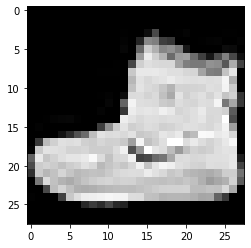

In [9]:
plt.imshow(X_train[0] , cmap='gray' )
plt.show()

In [10]:
y_train[0]

9

In [11]:
X_train = X_train / 255.0

In [12]:
X_test = X_test / 255.0

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
28*28

784

### Reshaping of the dataset



In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
28*28

784

In [17]:
X_train = X_train.reshape(60000, 784 )

In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
X_test = X_test.reshape(10000, 784)

In [20]:
X_train.shape

(60000, 784)

In [21]:
X_test.shape

(10000, 784)

## Stage 4: Building an Artificial Neural network

### Defining the model



In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
from keras.layers import Flatten

In [24]:
X_train.shape

(60000, 784)

In [25]:
from keras.layers import Dropout

In [26]:
def build_model():
  model = Sequential()
  model.add( Dense(128, 'relu' , input_shape=(784, ) ) )
  model.add( Dropout(0.2)  )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

### Adding the first layer (Dense layer)

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

### Adding a Dropout layer 



In [27]:
# 드랍아웃이란, 뉴런에 연결된 선을, 일부분을 잘라서, 학습이 잘 되도록 하는 방법

### Adding the second layer (output layer)

- units == number of classes (10 in the case of Fashion MNIST)
- activation = 'softmax'

### Comiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

### Training the model

In [28]:
model = build_model()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 밸리데이션 데이터를 따로 준비한 경우에, 사용하는 파라미터

In [31]:
epoch_history = model.fit(X_train, y_train, epochs=10, 
                          validation_data= ( X_test, y_test )   )

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5343 - accuracy: 0.8086 - val_loss: 0.4253 - val_accuracy: 0.8473
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8535 - val_loss: 0.3983 - val_accuracy: 0.8561
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3732 - accuracy: 0.8641 - val_loss: 0.3761 - val_accuracy: 0.8649
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3533 - accuracy: 0.8694 - val_loss: 0.3926 - val_accuracy: 0.8565
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3367 - accuracy: 0.8759 - val_loss: 0.3558 - val_accuracy: 0.8726
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3238 - accuracy: 0.8803 - val_loss: 0.3599 - val_accuracy: 0.8706
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8837 - val_loss: 0.3379 - val_accuracy:

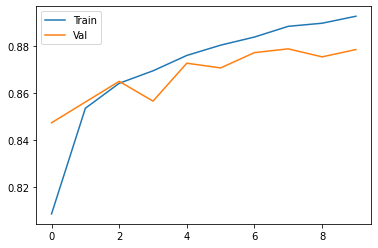

In [32]:
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.legend(['Train', 'Val'])
plt.show()

### Model evaluation and prediction

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8784


[0.3374974727630615, 0.8784000277519226]

## Stage 5 : Saving the model

### Saving the architecture 

In [ ]:
# ANN

In [33]:
# 전체 네트워크과 웨이트를 통으로 저장하고 불러오기 

In [35]:
# 폴더구조로 저장.
model.save('fashion_mnist_model')

In [38]:
# 저장된 인공지능을 불러오는 코드.
model2 = tf.keras.models.load_model('fashion_mnist_model')

In [39]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8784


[0.3374974727630615, 0.8784000277519226]

In [40]:
# 모델을, 파일 하나로 저장하는 방법

In [41]:
model.save('fashion_mnist_model.h5')

In [42]:
model3 = tf.keras.models.load_model('fashion_mnist_model.h5')

In [43]:
model3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.01888520e-06, 1.16218225e-05, 8.71631698e-07, ...,
        2.84284223e-02, 7.33646948e-06, 9.66002584e-01],
       [4.30318833e-05, 2.06677453e-09, 9.98250186e-01, ...,
        1.86545369e-15, 1.43973892e-07, 1.18494637e-13],
       [7.87623525e-12, 1.00000000e+00, 3.55402319e-14, ...,
        5.59617622e-16, 2.04705506e-11, 1.20679698e-14],
       ...,
       [3.37470556e-06, 7.18587145e-08, 8.03261628e-07, ...,
        1.58593849e-08, 9.99973893e-01, 1.21978772e-09],
       [1.48863899e-09, 9.99999642e-01, 2.65976152e-12, ...,
        1.10590748e-14, 1.11387832e-09, 2.84191904e-14],
       [2.34059576e-06, 2.01076119e-07, 6.03514309e-06, ...,
        3.78302811e-03, 1.06722662e-04, 1.75177283e-05]], dtype=float32)

### Saving network weights

In [44]:
# 네트워크만 저장하고 불러오기

In [45]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"c

In [48]:
model.to_yaml()

RuntimeError: ignored

In [51]:
# 네트워크를 json 파일로 저장하는 코드
fashion_mnist_network = model.to_json()
with open('fashion_mnist_network.json' , 'w') as file :
  file.write(fashion_mnist_network)

In [52]:
# 저장된 네트워크를 읽어오는 코드 
with open('fashion_mnist_network.json' , 'r') as file :
  fashion_net = file.read()

In [55]:
fashion_net

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"c

In [57]:
# 위의 네트워크로부터 모델을 만들고 싶으면
model4 = tf.keras.models.model_from_json(fashion_net)

In [59]:
# model4는 네트워크만 가져온 것이지,,, 학습 완료된 웨이트는 가져온것이 아니다.
# 따라서 현재 웨이트는 랜덤으로 셋팅된 웨이트다.
# 이것으로 예측 수행하면 안된다.

In [60]:
# 웨이트를 저장하고 불러오는 코드

In [61]:
model.save_weights('fashion_mnist_weight.h5')

In [62]:
model4.load_weights('fashion_mnist_weight.h5')

In [63]:
model4.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.01888520e-06, 1.16218225e-05, 8.71631698e-07, ...,
        2.84284223e-02, 7.33646948e-06, 9.66002584e-01],
       [4.30318833e-05, 2.06677453e-09, 9.98250186e-01, ...,
        1.86545369e-15, 1.43973892e-07, 1.18494637e-13],
       [7.87623525e-12, 1.00000000e+00, 3.55402319e-14, ...,
        5.59617622e-16, 2.04705506e-11, 1.20679698e-14],
       ...,
       [3.37470556e-06, 7.18587145e-08, 8.03261628e-07, ...,
        1.58593849e-08, 9.99973893e-01, 1.21978772e-09],
       [1.48863899e-09, 9.99999642e-01, 2.65976152e-12, ...,
        1.10590748e-14, 1.11387832e-09, 2.84191904e-14],
       [2.34059576e-06, 2.01076119e-07, 6.03514309e-06, ...,
        3.78302811e-03, 1.06722662e-04, 1.75177283e-05]], dtype=float32)

In [64]:
import joblib

In [ ]:
# joblib.dump( 스케일러나 인코더의 변수, pkl파일명 )

In [ ]:
# joblib.load( 스케일러나 인코드의 pkl파일명 )